In [103]:
# Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [104]:
# Dataset
data = pd.read_csv('Cosmetic Data.csv')

In [105]:
print(data.head())

                event_time event_type  product_id          category_id  \
0  2020-01-01 00:00:00 UTC       view     5809910  1602943681873052386   
1  2020-01-01 00:00:09 UTC       view     5812943  1487580012121948301   
2  2020-01-01 00:00:19 UTC       view     5798924  1783999068867920626   
3  2020-01-01 00:00:24 UTC       view     5793052  1487580005754995573   
4  2020-01-01 00:00:25 UTC       view     5899926  2115334439910245200   

  category_code     brand  price    user_id  \
0           NaN   grattol   5.24  595414620   
1           NaN  kinetics   3.97  595414640   
2           NaN    zinger   3.97  595412617   
3           NaN       NaN   4.92  420652863   
4           NaN       NaN   3.92  484071203   

                           user_session  
0  4adb70bb-edbd-4981-b60f-a05bfd32683a  
1  c8c5205d-be43-4f1d-aa56-4828b8151c8a  
2  46a5010f-bd69-4fbe-a00d-bb17aa7b46f3  
3  546f6af3-a517-4752-a98b-80c4c5860711  
4  cff70ddf-529e-4b0c-a4fc-f43a749c0acb  


### Creating necessary Date & Time columns

In [106]:
# Separating timezones and converting string into proper datetime
data['timezone'] = data['event_time'].str.rsplit(" ",n=1,expand=True)[1]
data["event_time"]= data["event_time"].str.rsplit(" ", n=1,expand = True)[0]
data["event_time"]=pd.to_datetime(data["event_time"])

In [107]:
# Creating date,time,hours,weekday,weeknum columns
data['date'] = data["event_time"].dt.normalize()
data["time"] = data['event_time'].dt.time
data["hours"] = data['event_time'].dt.hour
data["weekday"] = data['event_time'].dt.weekday
data['weeknum'] = data['event_time'].dt.isocalendar().week

In [108]:
# Adding string prefix 'week_' to 'weeknum' value Replacing numeric weekday values (0–6) with abbreviated day names 
data['weeknum'] = 'week_' + data['weeknum'].astype(str)
data['weekday'] = data['weekday'].replace({0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

In [109]:
print(data.head())

           event_time event_type  product_id          category_id  \
0 2020-01-01 00:00:00       view     5809910  1602943681873052386   
1 2020-01-01 00:00:09       view     5812943  1487580012121948301   
2 2020-01-01 00:00:19       view     5798924  1783999068867920626   
3 2020-01-01 00:00:24       view     5793052  1487580005754995573   
4 2020-01-01 00:00:25       view     5899926  2115334439910245200   

  category_code     brand  price    user_id  \
0           NaN   grattol   5.24  595414620   
1           NaN  kinetics   3.97  595414640   
2           NaN    zinger   3.97  595412617   
3           NaN       NaN   4.92  420652863   
4           NaN       NaN   3.92  484071203   

                           user_session timezone       date      time  hours  \
0  4adb70bb-edbd-4981-b60f-a05bfd32683a      UTC 2020-01-01  00:00:00      0   
1  c8c5205d-be43-4f1d-aa56-4828b8151c8a      UTC 2020-01-01  00:00:09      0   
2  46a5010f-bd69-4fbe-a00d-bb17aa7b46f3      UTC 2020-01-01  0

In [110]:
# Filtering irrelavant data by checking range and datatypes 
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 15 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
 9   timezone       object        
 10  date           datetime64[ns]
 11  time           object        
 12  hours          int32         
 13  weekday        object        
 14  weeknum        object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(8)
memory usage: 471.8+ MB
None
                          event_time    product_id   category_id  \
count                        4264752  4.264752e+06  4.264752e+06   
mean   2020-01-17 10:32:51.886843136  5.492516e+06  1.5583

In [111]:
# Calculating orders that are returned 
returned_orders = data[data['price']<0]['price'].count()
returned_orders_perc = returned_orders/(data['price'].count())
returned_orders_perc = round(returned_orders_perc * 100, 2)  
print(f"{returned_orders_perc}% of total orders were returned.")

0.0% of total orders were returned.


In [112]:
# Null data in the dataset 
data = data[data['price'] >= 0]
perc_null = data.isnull().sum() * 100 / len(data) # Percentage of missing values in All columns
print(round(perc_null,2))

event_time        0.00
event_type        0.00
product_id        0.00
category_id       0.00
category_code    98.25
brand            41.63
price             0.00
user_id           0.00
user_session      0.03
timezone          0.00
date              0.00
time              0.00
hours             0.00
weekday           0.00
weeknum           0.00
dtype: float64


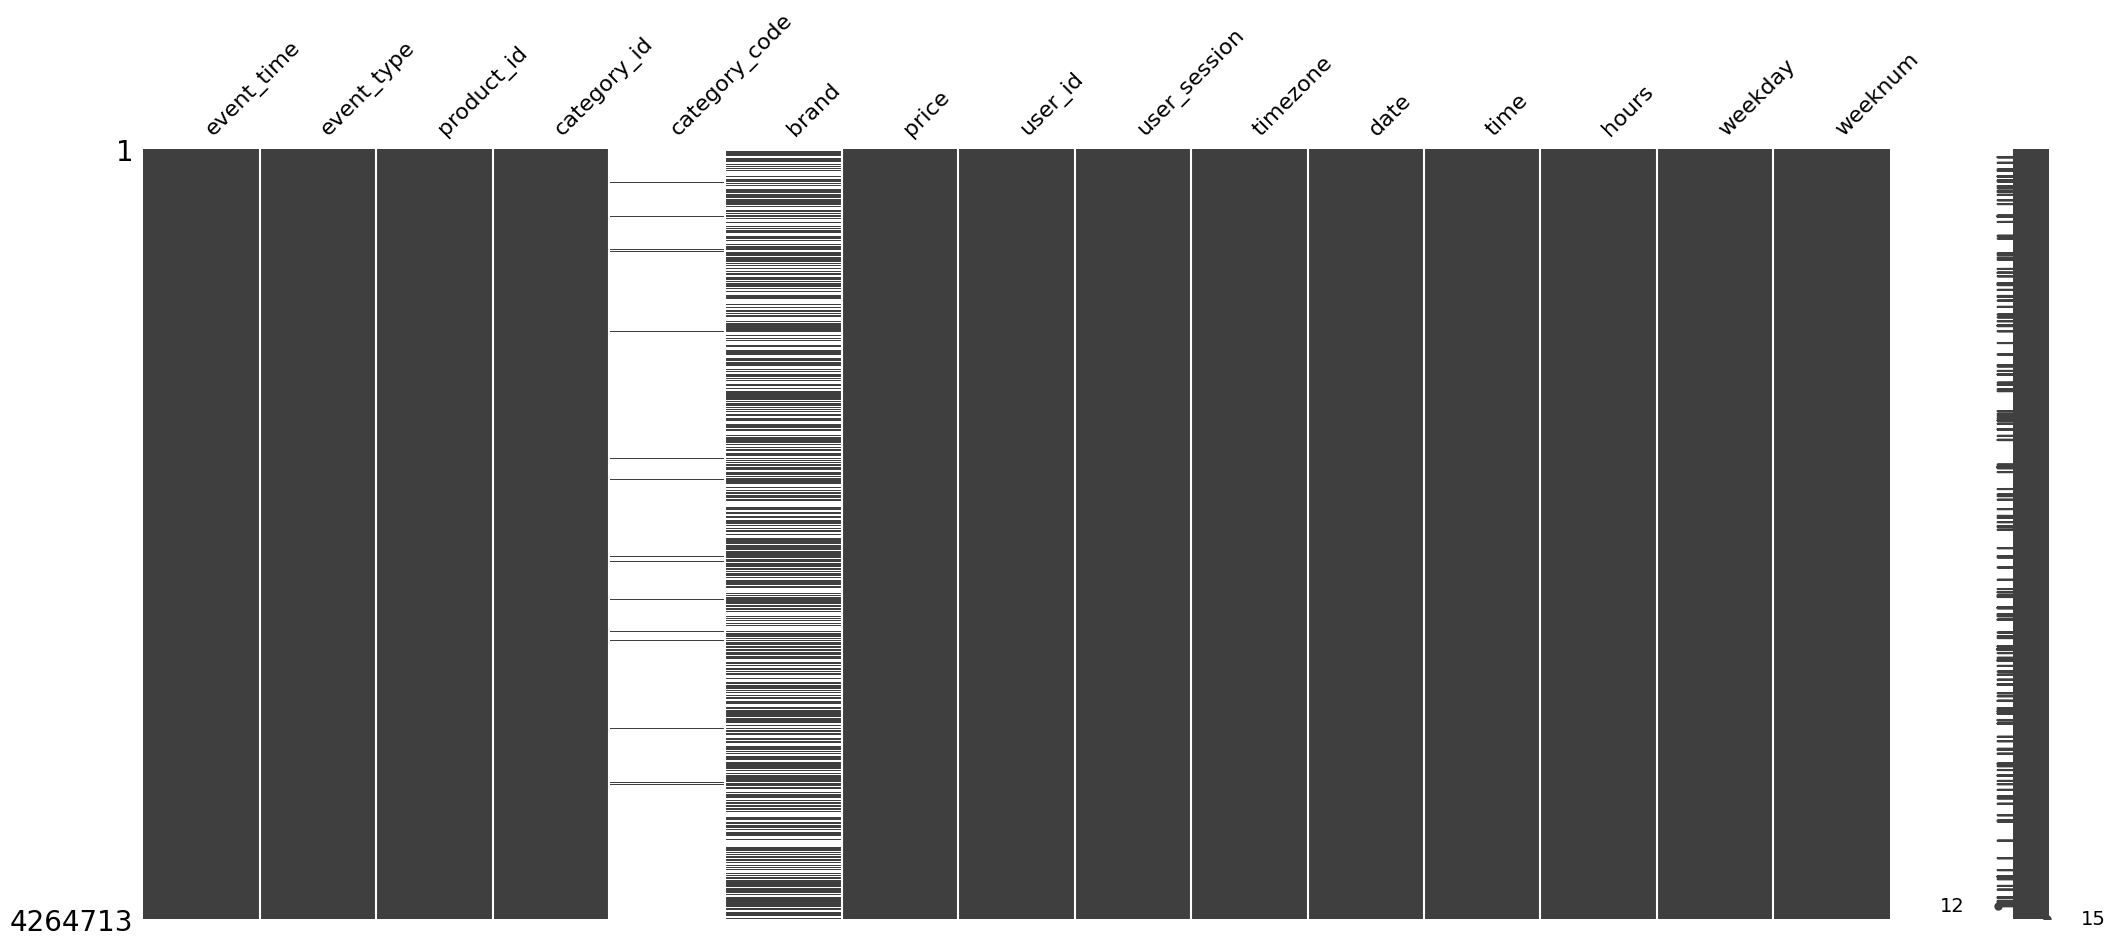

In [113]:
# Visualising missing values 
msno.matrix(data)
plt.show()

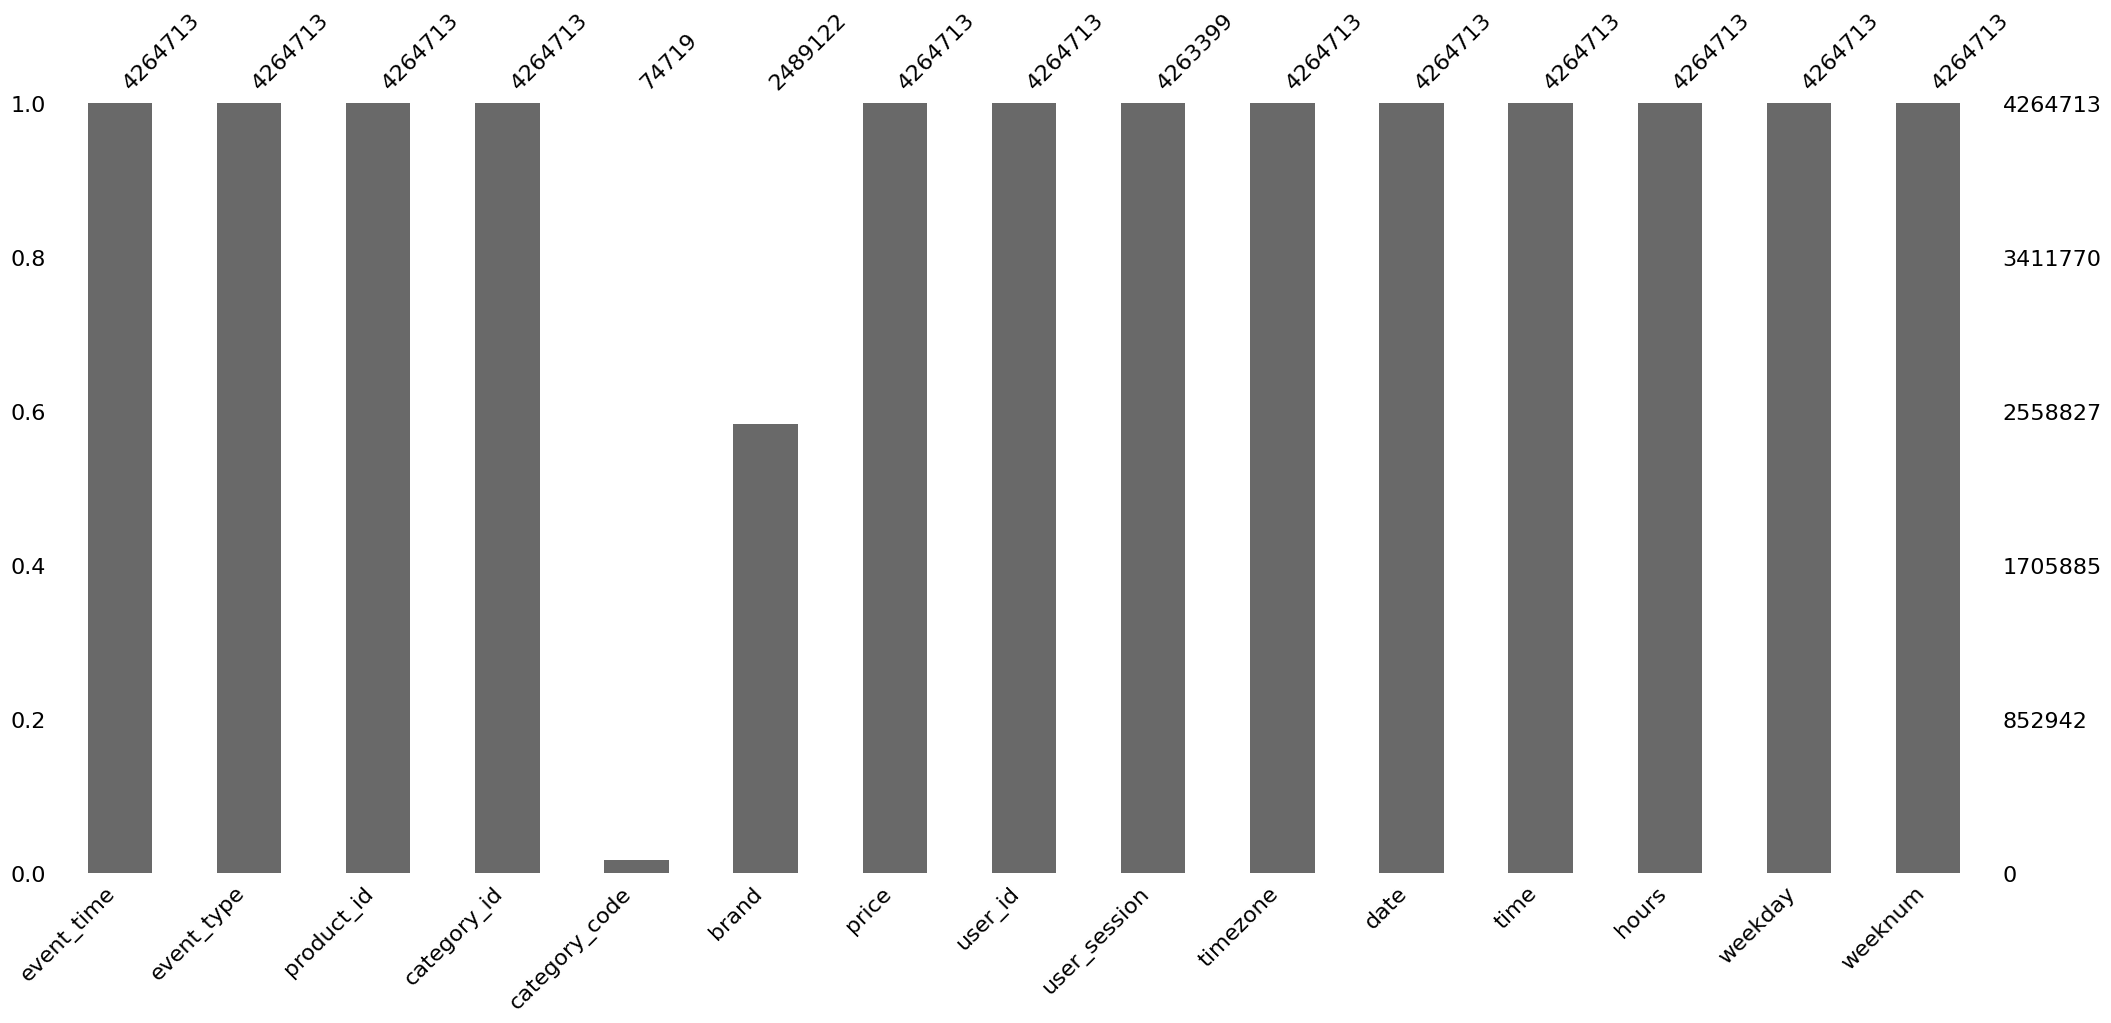

In [114]:
msno.bar(data)
plt.show()

# Data Analysis & Visualisation

In [115]:
# Unique values in dataset 
data.nunique()

event_time       1811716
event_type             4
product_id         45479
category_id          482
category_code         12
brand                256
price               2092
user_id           410073
user_session      965350
timezone               1
date                  31
time               86400
hours                 24
weekday                7
weeknum                5
dtype: int64

In [116]:
# Creating customer purchase visualisation
data.event_type.unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

In [117]:
# Data grouping for customer purchase visualisation
data_funnel = data[data['event_type'] != 'remove_from_cart'].groupby(['event_type'], as_index=False)['event_time'].count()
data_funnel.columns = ['event_type', '# events']
data_funnel.sort_values('# events', inplace=True, ascending=False)
data_funnel.reset_index(drop=True, inplace=True)
data_funnel['percent'] = data_funnel['# events'] / data_funnel['# events'].sum() * 100
print(data_funnel)

  event_type  # events    percent
0       view   2037606  59.066351
1       cart   1148323  33.287716
2   purchase    263761   7.645933


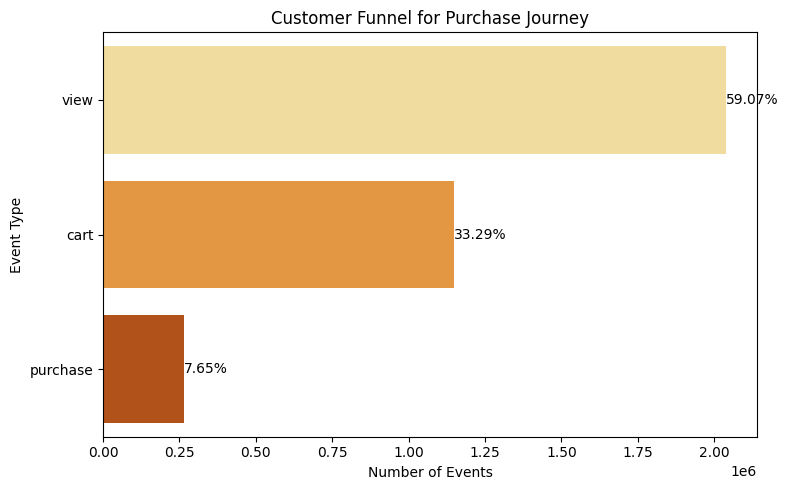

In [118]:
# Visualisation 
plt.figure(figsize=(8, 5))
sns.barplot(data=data_funnel, y='event_type', x='# events', hue='event_type', palette="YlOrBr", legend=False)
for index, row in data_funnel.iterrows():
    plt.text(row['# events'], index, f"{row['percent']:.2f}%", va='center')
plt.title("Customer Funnel for Purchase Journey")
plt.xlabel("Number of Events")
plt.ylabel("Event Type")
plt.tight_layout()
plt.show()

In [119]:
# Hourly website traffic 
datahour = data.groupby(['hours', 'weeknum'], as_index=False)['price'].count()
datahour.columns = ['hours', 'weeknum', 'price']

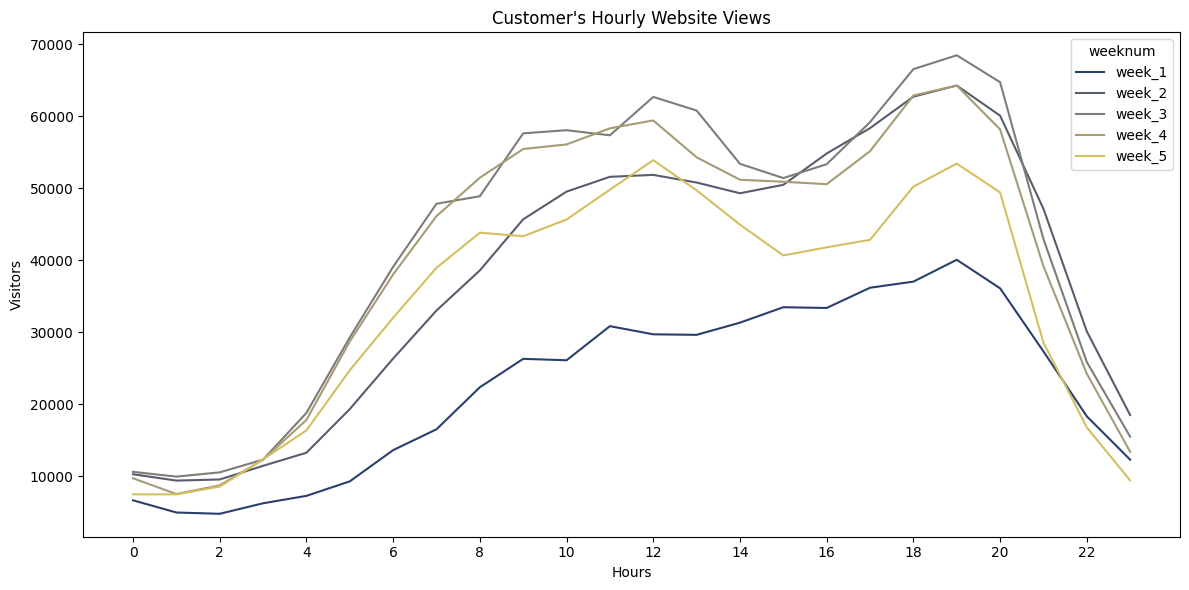

In [120]:
#Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=datahour, x='hours', y='price', hue='weeknum', palette="cividis")
plt.title("Customer's Hourly Website Views")
plt.xlabel("Hours")
plt.ylabel("Visitors")
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

In [121]:
# Daily sales, Ticket size, Number of orders 
datadate = data[data['event_type'] == 'purchase'].groupby(['date'], as_index=False)['price'].sum()
datadateh = data[data['event_type'] == 'purchase'].groupby(['date'], as_index=False)['price'].count()
datadateh['avg_ticket'] = datadate['price'] / datadateh['price']
datadate['date'] = pd.to_datetime(datadate['date'])
datadateh['date'] = pd.to_datetime(datadateh['date'])
datadate.columns = ['date', 'price']

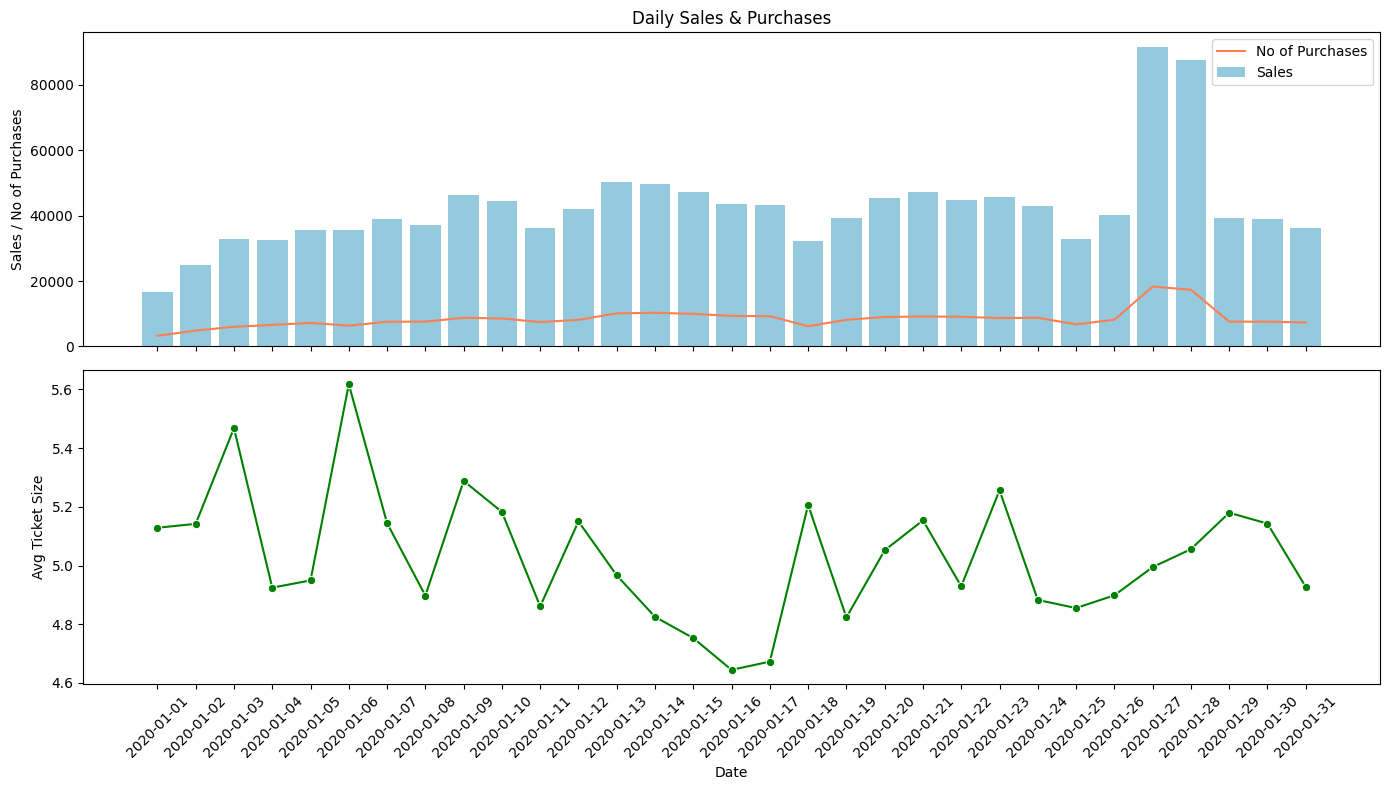

In [122]:
# Visualisation 
datadate['date_str'] = datadate['date'].dt.strftime('%Y-%m-%d')
datadateh['date_str'] = datadateh['date'].dt.strftime('%Y-%m-%d')

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Sales & No of Purchases
sns.barplot(ax=axes[0], data=datadate, x='date_str', y='price', color='skyblue', label='Sales')
sns.lineplot(ax=axes[0], data=datadateh, x='date_str', y='price', color='coral', label='No of Purchases')
axes[0].legend()
axes[0].set_ylabel('Sales / No of Purchases')
axes[0].set_title('Daily Sales & Purchases')

# Avg Ticket Size (Fix: use date_str here too)
sns.lineplot(ax=axes[1], data=datadateh, x='date_str', y='avg_ticket', color='green', marker="o")
axes[1].set_ylabel('Avg Ticket Size')
axes[1].set_xlabel('Date')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [123]:
# Hourly sales in January  
datadatehour = data[data['event_type'] == 'purchase'].groupby(['date', 'hours'], as_index=False)['price'].sum()
datadatehour.columns = ['date', 'hours', 'price']
datadatehour['hours'] = datadatehour['hours'].astype(str)
datadatehour['date'] = datadatehour['date'].astype(str)

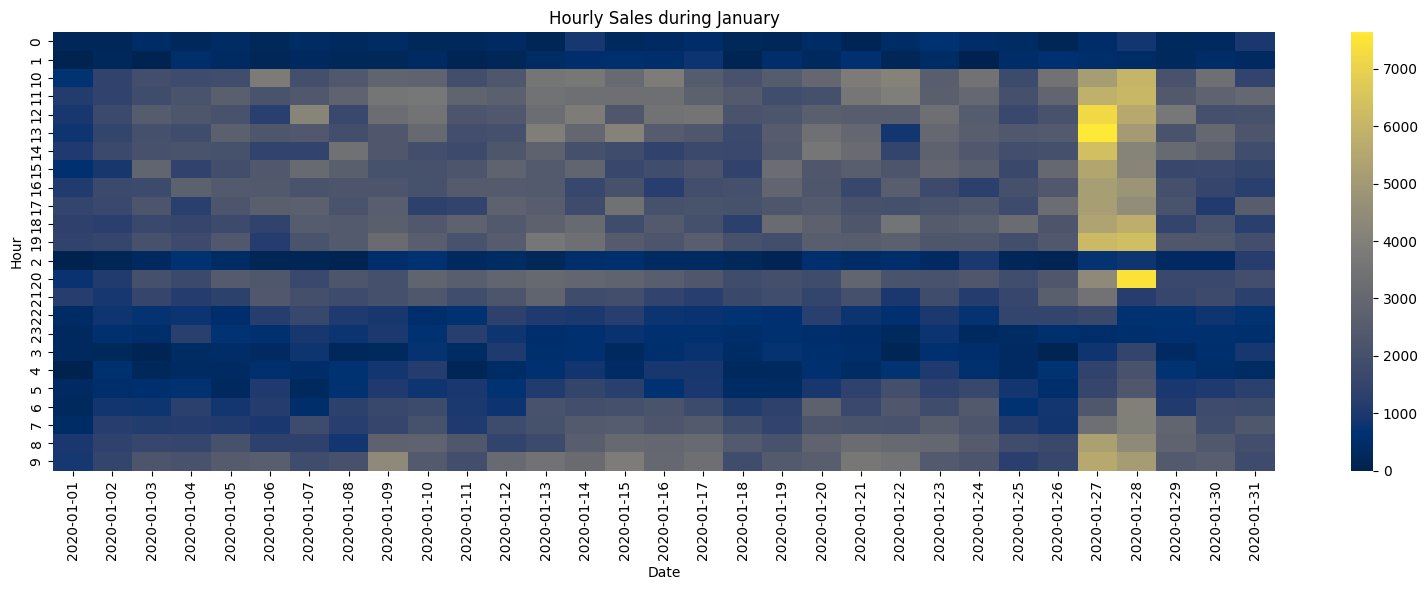

In [124]:
# Visualisation 
pivot_hourly = datadatehour.pivot_table(index='hours', columns='date', values='price', fill_value=0)
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_hourly, cmap='cividis')
plt.title('Hourly Sales during January')
plt.xlabel('Date')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

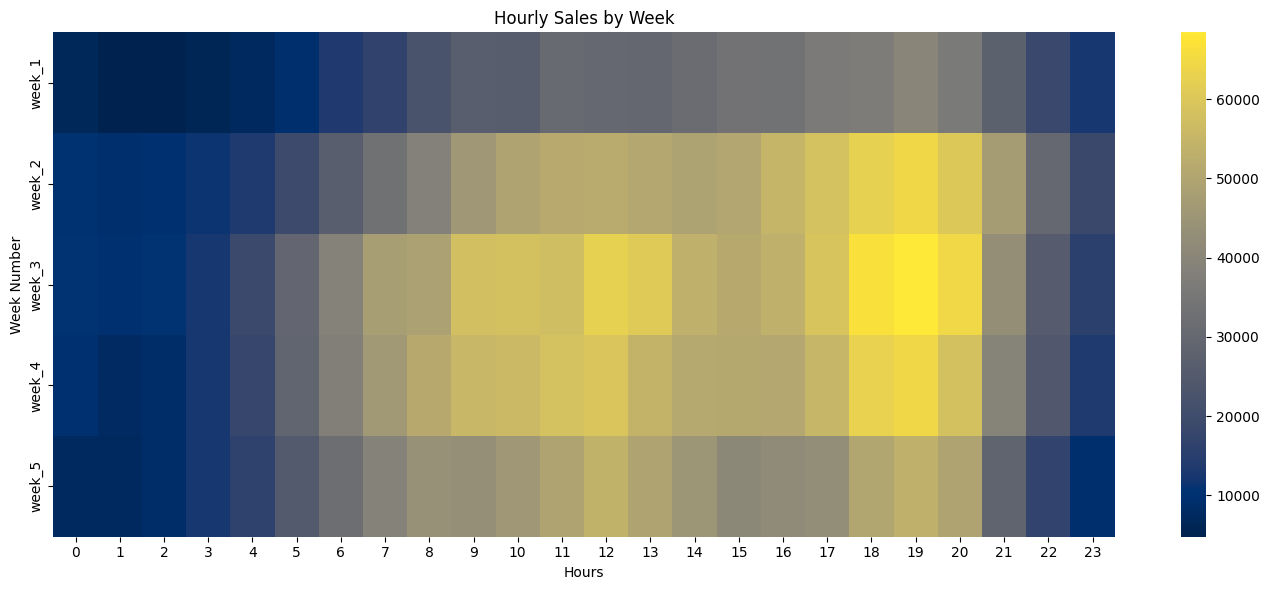

In [125]:
# Hourly sales in January by weeks 
pivot_week = datahour.pivot_table(index='weeknum', columns='hours', values='price', fill_value=0)
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_week, cmap='cividis')
plt.title('Hourly Sales by Week')
plt.xlabel('Hours')
plt.ylabel('Week Number')
plt.tight_layout()
plt.show()